# <span style="color:#9c8f8f"> 75.06/95.58 Organización de Datos</span>
# <span style="color:#9c8f8f"> Análisis exploratorio: Real or Not? NLP with Disaster Tweets</span>

# <center>FEATURE ENGINEERING</center>
# <center>Decision trees</center>

In [1]:
# Cargo librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree

In [2]:
# Cargo train and test

dtype_train = {"id": np.int32, "keyword": "category", "target" : int}
train = pd.read_csv("original_data/train.csv", dtype = dtype_train, encoding='UTF_8')

In [3]:
# Creo dataframe con target

target_train = train[["id","target"]]

In [4]:
DIR_CSV = "features/"

# I) Understanding decision trees

* In the decision tree chart, each internal node has a decision rule that splits the data.

* Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

* There is no need to normalize columns.

# II) Auxiliary Functions

In [5]:
def decision_tree_feature_search(X,y,m):
    
    # Model creation
    
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X, y)
    
    # Feature importance

    feature_importances = clf.feature_importances_

    # get index of m most important features sorted

    m_index = np.argpartition(feature_importances, -m)[-m:]
    m_index = m_index[np.argsort(feature_importances[m_index])][::-1]
    
    # Get the m most important features of locations

    m_feature_importances = feature_importances[m_index]
    
    # Get m feature name
    
    m_feature_name = X.columns[m_index]
    
    return feature_importances, m_index, m_feature_importances, m_feature_name

In [6]:
# m cantidad de features con más relevancia

def decision_trees_files(previous_dir, files, m_value, pos=[2,-2]):
    
    # contiene una lista por archivo con feature_importances, m_index, m_feature_importances, m_feature_name
    locations_others_info = []
    

    for i in range(len(files)):
        
        # cargo archivo

        df = pd.read_csv(previous_dir + files[i], low_memory=False)
        cols = df.columns

        # Agrego target mal guardado en csv
        
        if("target" not in df.columns):
            df = df.merge(target_train, how="inner", on="id")    
        
        # verifico pos
        pos_inicio = pos[0]
        pos_final = pos[1]
        if pos_final==None:
            pos_final = len(cols)-1
        
        # Separo mi data
        X = df.loc[:,cols[pos_inicio]:cols[pos_final]].fillna(0)
        y = df["target"]
        
        m = m_value
        # Verifico m
        if m >= len(X.columns):
            m = len(X.columns)

        # Aplico desition tree

        feature_importances, m_index, m_feature_importances, m_feature_name = decision_tree_feature_search(X,y,m)
        locations_others_info.append([feature_importances, m_index, m_feature_importances, m_feature_name])

        # Imprimo informacion
        print_feature_search(m_feature_name, m_feature_importances, files[i])
        print("\n\n")
    
    
    return locations_others_info

In [7]:
def plot_decision_tree(X,y,depth):
    
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf= clf.fit(X, y)

    plt.figure(1, figsize=(10,10))
    tree.plot_tree(clf, filled=True)
    
    plt.show()

In [8]:
def print_feature_search(feature, importance, file):
    
    print("{}\n".format(file.upper()))
    print("{: >20} {: >20}\n".format("feature","importance"))
    for i in range(len(feature)):
        print("{: >20}\t\t{: >20}".format(feature[i],importance[i]))

# III) Desition trees

## 1. Keywords

In [9]:
files_keywords = ["features_keywords_in_text_encoded.csv", "features_keywords_numerical.csv"]
DT_keywords = decision_trees_files(DIR_CSV + 'train/' ,files_keywords, 20,[3,None])

FEATURES_KEYWORDS_IN_TEXT_ENCODED.CSV

             feature           importance

              K_fire		 0.05661728198438582
              K_bomb		0.051991259947314974
             K_storm		0.036827459863518916
           K_typhoon		0.025896939916620513
            K_debris		0.024404951233193972
            K_derail		 0.02220832851823863
            K_police		0.021374263304411927
             K_flood		0.020311834674881086
          K_wreckage		 0.02028981280941414
          K_outbreak		  0.0200220682567302
             K_crash		 0.01954328697733305
         K_oil spill		0.018819244115054028
           K_rescuer		0.017821643267390518
            K_attack		0.017714721283724127
        K_earthquake		0.016631669122568034
          K_disaster		0.015533660234610613
         K_terrorism		0.015390958667775985
          K_accident		0.015145603909358245
          K_hellfire		 0.01337722978641839
       K_mass murder		0.013269934793222967



FEATURES_KEYWORDS_NUMERICAL.CSV

             feature  

## 2. Text 

In [10]:
files_text = ['features_tagged.csv',
'features_tagged_smooth.csv',
'features_hashtags.csv',
'features_hashtags_smooth.csv',
             ]
files_text_numerical=['features_arrobas_numerical.csv',
'features_text_numerical.csv',
'features_hashtags_numerical.csv']

In [11]:
DT_text_numerical = decision_trees_files(DIR_CSV + 'train/', files_text_numerical, 20, [3,None])

FEATURES_ARROBAS_NUMERICAL.CSV

             feature           importance

       #tagged_users		                 1.0



FEATURES_TEXT_NUMERICAL.CSV

             feature           importance

   promedio_len_word		 0.22388460449114755
            #silabas		 0.15826725184797152
         #caracteres		 0.12023201256500525
         #capitalize		 0.09231945776372578
          #stopwords		   0.081622906748255
         #mayusculas		 0.06359349316907079
    #palabras_unicas		 0.05569103176162734
         #puntuacion		 0.04957838617936796
#caracteres_especiales		  0.0431635963830134
           #palabras		0.034803643747599866
   #stopwords_binned		0.013396323810798562
     #silabas_binned		0.011776451399292938
#palabras_unicas_binned		0.010538727315405633
  #capitalize_binned		0.009434100405395562
    #palabras_binned		0.009171023443589152
#caracteres_especiales_binned		0.008105315962382675
  #caracteres_binned		0.007811202113985194
  #puntuacion_binned		0.006610470892365958
  #mayusculas_binne

In [12]:
DT_text_numerical = decision_trees_files(DIR_CSV + 'train/', files_text_numerical, 20, [1,-2])

FEATURES_ARROBAS_NUMERICAL.CSV

             feature           importance

              target		                 1.0
                  id		                 0.0



FEATURES_TEXT_NUMERICAL.CSV

             feature           importance

              target		                 1.0
     #silabas_binned		                 0.0
  #mayusculas_binned		                 0.0
           #palabras		                 0.0
    #palabras_unicas		                 0.0
         #caracteres		                 0.0
          #stopwords		                 0.0
         #puntuacion		                 0.0
         #capitalize		                 0.0
         #mayusculas		                 0.0
            #silabas		                 0.0
   promedio_len_word		                 0.0
#caracteres_especiales		                 0.0
    #palabras_binned		                 0.0
#palabras_unicas_binned		                 0.0
  #caracteres_binned		                 0.0
   #stopwords_binned		                 0.0
  #puntuacion_binned		      

## 3. Locations

### 3.1 features_location_bow

In [13]:
files_location = ['features_location_bow.csv','features_location_tf_idf.csv']
DT_location = decision_trees_files(DIR_CSV + 'train/' , files_location, 10)

FEATURES_LOCATION_BOW.CSV

             feature           importance

          country_in		 0.11136710508726257
          country_de		0.040504034186906804
          country_ph		 0.03570658695359261
          country_pk		 0.03306242103190922
          country_ie		 0.03245270967869037
          country_it		0.030874738475332994
          country_pt		  0.0281444156736485
          country_ne		0.026497982514741905
          country_pe		 0.02628551625936288
          country_be		 0.02626522248113648



FEATURES_LOCATION_TF_IDF.CSV

             feature           importance

          country_ph		 0.05067904679247152
          country_pk		0.049624034678962696
          country_pt		 0.04132740981083981
          country_kr		 0.03802966740101018
          country_pe		 0.03800093323600403
          country_vn		 0.03797223162479722
          country_ke		 0.03507557140953691
          country_gh		0.030826967520841193
          country_ro		0.029320630022855815
          country_ne		0.0286857991056

### 3.2 features_location_numerical

In [14]:
files_location_numerical = ['features_location_numerical.csv']
DT_location_numerical = decision_trees_files(DIR_CSV + 'train/' , files_location_numerical, 10, [3,None])

FEATURES_LOCATION_NUMERICAL.CSV

             feature           importance

       has_continent		  0.4201219975712411
            has_city		  0.3638730453189099
          has_county		 0.09863419218254829
           has_state		 0.08259389943509134
         has_country		 0.03477686549220937





### 3.3 features_location_in_text_numerical

In [15]:
files_location_in_text_numerical = ['features_location_in_text_numerical.csv']

In [16]:
# cargo archivo
df_location_in_text_numerical = pd.read_csv(DIR_CSV + 'train/features_location_in_text_numerical.csv', low_memory=False)
display(df_location_in_text_numerical.head(2))

# Agrego target mal guardado en csv
del df_location_in_text_numerical["target"]
df_location_in_text_numerical = df_location_in_text_numerical.merge(target_train, how="inner", on="id")

# Separo mi data
X = df_location_in_text_numerical.loc[:,"has_country":"has_continent"]
y = df_location_in_text_numerical["target"]

DT_location_in_text_numerical = [decision_tree_feature_search(X,y,5)]

,Unnamed: 0,id,target,has_country,has_city,has_county,has_state,has_continent
0,0,1,NaN,0,0,0,0,0
1,1,4,NaN,1,0,0,0,1


In [17]:
# Imprimo informacion
print_feature_search(DT_location_in_text_numerical[0][-1], DT_location_in_text_numerical[0][-2], "features_location_in_text_numerical.csv")

FEATURES_LOCATION_IN_TEXT_NUMERICAL.CSV

             feature           importance

       has_continent		  0.9667359633952927
            has_city		0.019875124620939873
           has_state		0.010282301066125318
         has_country		0.0028974921773544946
          has_county		0.00020911874028769554


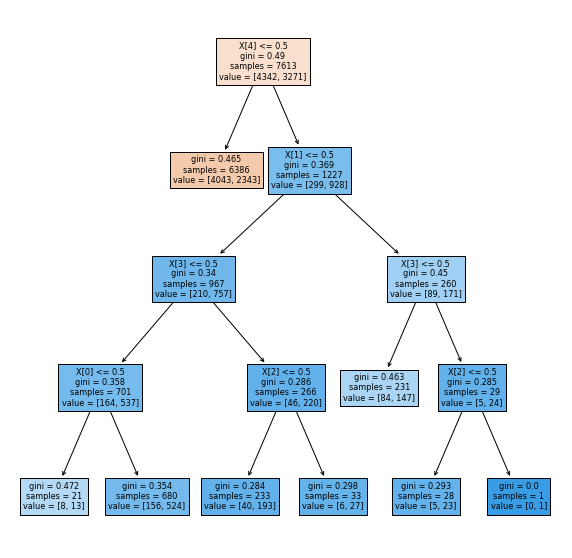

In [18]:
plot_decision_tree(X,y,5)

### 3.5 Country, Continent, City and State

In [19]:
files_location_places = ['features_city_encoded.csv',
    'features_city_in_text_encoded.csv',
    'features_country_encoded.csv',
    'features_country_in_text_encoded.csv',
    'features_county_encoded.csv',
    'features_county_in_text_encoded.csv',
    'features_state_encoded.csv',
    'features_state_in_text_encoded.csv',
    'features_continent_encoded.csv',
    'features_continent_in_text_encoded.csv']

DT_location_places = decision_trees_files(DIR_CSV + 'train/' , files_location_places, 10)

FEATURES_CITY_ENCODED.CSV

             feature           importance

         city_Mumbai		0.024162085171152564
     city_Washington		 0.02397432806580939
           city_York		0.021575072484253176
     city_Sacramento		0.012526738820626679
        city_Karachi		0.009182439822278687
       city_Coventry		0.007731320582748915
         city_Oregon		0.007589385620246751
        city_Calgary		0.006917070352175422
        city_Jakarta		0.006908511618374265
         city_Dundee		0.006906504480455745



FEATURES_CITY_IN_TEXT_ENCODED.CSV

             feature           importance

         city_Saipan		 0.12189315994478064
         city_Police		0.022515825307493405
         city_Kaduna		 0.02133331501239071
         city_Mumbai		 0.02131079964034921
        city_Antioch		0.016027483511858478
       city_Udhampur		 0.01601478344568503
           city_Nice		0.014774834425545929
  city_Silver Spring		 0.01132735474536293
        city_Buffalo		0.010770440167579255
      city_Palestine		0.01076471

## 4. Links

### 4.1 features_links_numerical

In [31]:
files_links_numerical = ['features_links_numerical.csv']

In [21]:
# cargo archivo

df_links_numerical = pd.read_csv(DIR_CSV + 'train/features_links_numerical.csv', low_memory=False)
df_links_numerical = df_links_numerical [["id", "links_cant", "cant_failed_links"]]
display(df_links_numerical.head(2))

,id,links_cant,cant_failed_links
0,48,1,0
1,49,1,0


In [22]:
m = 2

# Agrego target mal guardado en csv
df_links_numerical = df_links_numerical.merge(target_train, how="inner", on="id")

# Separo mi data
cols = df_links_numerical.columns
X = df_links_numerical.loc[:,cols[1]:cols[-2]]
y = df_links_numerical["target"]

# Aplico desition tree
feature_importances_links_numerical, m_index_links_numerical, m_feature_importances_links_numerical, m_feature_name_links_numerical = decision_tree_feature_search(X,y,m)

# Imprimo informacion
print_feature_search(m_feature_name_links_numerical, m_feature_importances_links_numerical, "features_links_numerical.csv")

FEATURES_LINKS_NUMERICAL.CSV

             feature           importance

          links_cant		  0.8897528194199257
   cant_failed_links		 0.11024718058007439


### 4.2 domains

In [30]:
files_domains = ["features_domain_bow.csv", "features_domain_tf_idf.csv", "features_domain_smooth_tf_idf.csv"]

In [24]:
DT_domains = decision_trees_files(DIR_CSV + 'train/' , file_domains, 20)

FEATURES_DOMAIN_BOW.CSV

             feature           importance

         domain_ebay		  0.0512237262884467
          domain_bbc		 0.02834430902425823
         domain_news		0.027502150165272556
      domain_youtube		 0.01820193708565211
      domain_twitter		 0.01586290305056721
          domain_cue		 0.01576063041811373
      domain_latimes		0.015562245113309782
  domain_feedsportal		0.012090302911725918
      domain_abcnews		0.012003957492899935
          domain_gov		 0.01188470026947286
        domain_wired		0.010961997440096568
    domain_billboard		0.009887723677175764
           domain_co		0.009885972005520646
       domain_amazon		 0.00987678868622971
    domain_instagram		0.009198231569808549
    domain_careerarc		0.008855751281255299
       domain_tumblr		0.008671780796415745
     domain_facebook		0.007983523481272205
domain_emergencyxpreparation		0.007509259730514096
           domain_au		0.006406727311923717



FEATURES_DOMAIN_TF_IDF.CSV

             feature           im

## 5. Tags

In [25]:
files_tags = ["features_tags_bow.csv", "features_tags_tf_idf.csv"]

In [26]:
decision_tree_tags =decision_trees_files(DIR_CSV + 'train/' , files_tags, 20)

FEATURES_TAGS_BOW.CSV

             feature           importance

            tag_fire		0.025323101989574555
       tag_hiroshima		0.022535842838259944
         tag_suicide		0.022411761547931168
              tag_mh		0.018482137196645484
           tag_train		 0.01799722505776718
        tag_wildfire		 0.01771133467498481
          tag_killed		0.016399509793829776
         tag_typhoon		0.014795768909343553
         tag_migrant		0.012426904584867504
           tag_storm		0.012343018713143545
           tag_spill		0.011873316703858943
     tag_legionnaire		0.011737843602260278
         tag_warning		0.011598905206773022
          tag_police		 0.01098894447566283
          tag_people		0.010985293799118273
        tag_accident		0.009986798331988758
           tag_japan		  0.0094538047526215
      tag_earthquake		0.009232425125523332
         tag_israeli		0.008692580659809863
         tag_airport		 0.00804776927663771



FEATURES_TAGS_TF_IDF.CSV

             feature           importance

  

# Decision tree with every features

In [35]:
# Busco los nombres de todos los archivos

lists_of_files = [files_keywords,
         files_text_numerical,
         files_text,
         files_location,
         files_location_places,
         files_location_in_text_numerical,
         files_location_numerical,
         files_links_numerical,
         files_domains,
         files_tags]

files = []
for l in lists_of_files:
    for e in l:
        files.append(e)

files

['features_keywords_in_text_encoded.csv',
 'features_keywords_numerical.csv',
 'features_arrobas_numerical.csv',
 'features_text_numerical.csv',
 'features_hashtags_numerical.csv',
 'features_tagged.csv',
 'features_tagged_smooth.csv',
 'features_hashtags.csv',
 'features_hashtags_smooth.csv',
 'features_location_bow.csv',
 'features_location_tf_idf.csv',
 'features_city_encoded.csv',
 'features_city_in_text_encoded.csv',
 'features_country_encoded.csv',
 'features_country_in_text_encoded.csv',
 'features_county_encoded.csv',
 'features_county_in_text_encoded.csv',
 'features_state_encoded.csv',
 'features_state_in_text_encoded.csv',
 'features_continent_encoded.csv',
 'features_continent_in_text_encoded.csv',
 'features_location_in_text_numerical.csv',
 'features_location_numerical.csv',
 'features_links_numerical.csv',
 'features_domain_bow.csv',
 'features_domain_tf_idf.csv',
 'features_domain_smooth_tf_idf.csv',
 'features_tags_bow.csv',
 'features_tags_tf_idf.csv']

In [56]:
# Creo único df

df_unico = train[["id"]]

In [57]:
for f in files:
    df = pd.read_csv(DIR_CSV+"train/"+f, header=0)
    df_unico = df_unico.merge(df, on="id", how="left")

In [59]:
df_unico.columns

Index(['id', 'Unnamed: 0_x', 'target_x', 'K_ablaze', 'K_accident',
       'K_aftershock', 'K_airplane accident', 'K_ambulance', 'K_annihilate',
       'K_annihilation',
       ...
       'tag_wind_y', 'tag_windstorm_y', 'tag_woman_y', 'tag_wound_y',
       'tag_wounded_y', 'tag_wreck_y', 'tag_wreckage_y', 'tag_wrecked_y',
       'tag_yr_y', 'tag_zone_y'],
      dtype='object', length=13963)

In [60]:
y = df_unico["target_x"]
del df_unico["target_x"]
del df_unico["id"]
del df_unico["Unnamed: 0_x"]
X = df_unico


In [61]:
X = X.fillna(0)

In [ ]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

In [ ]:
feature_importances, m_index, m_feature_importances, m_feature_name = decision_tree_feature_search(X,y,20)

In [ ]:
print_feature_search(m_feature_name, m_feature_importances, "único árbol con todos los features")

# IV) Conclusion